In [353]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

SilverNPs = pd.read_csv("../input/SilverNPs.csv")

In [354]:
SilverNPs.describe()

,ID,N_Atoms,N_Bulk,N_Surface,R_min,R_max,R_diff,R_avg,R_std,R_skew,...,T17,T18,T19,T20,T>20,Formation_E,EF,IP,EA,EG
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,...,425.0,425.0,425.0,425.0,425.0,425.000000,425.000000,425.000000,425.000000,425.000000
mean,213.000000,1239.315294,762.503529,476.811765,13.141773,18.830056,5.688284,15.452304,1.488730,0.340574,...,0.0,0.0,0.0,0.0,0.0,0.149397,-3.849168,4.324642,3.376054,0.948588
std,122.831185,801.498452,561.252038,246.148525,3.995470,6.144755,3.444664,4.621321,0.899127,0.438593,...,0.0,0.0,0.0,0.0,0.0,0.127103,0.115435,0.188174,0.258104,0.382663
min,1.000000,13.000000,1.000000,12.000000,2.630300,2.833600,0.203400,2.664400,0.079100,-1.048700,...,0.0,0.0,0.0,0.0,0.0,0.028319,-4.094000,4.010600,2.129600,0.535500
25%,107.000000,550.000000,268.000000,272.000000,10.440400,14.639300,3.508800,12.243700,0.892500,0.074800,...,0.0,0.0,0.0,0.0,0.0,0.067486,-3.950900,4.213000,3.251600,0.694000
50%,213.000000,1133.000000,675.000000,472.000000,13.476300,19.221600,4.785500,16.005000,1.143600,0.331300,...,0.0,0.0,0.0,0.0,0.0,0.107963,-3.848800,4.306000,3.430600,0.828000
75%,319.000000,1851.000000,1158.000000,662.000000,16.027700,23.053000,7.041700,19.209000,1.870000,0.643400,...,0.0,0.0,0.0,0.0,0.0,0.181273,-3.763400,4.386200,3.569200,1.059100
max,425.000000,2947.000000,2057.000000,1154.000000,21.035100,42.930100,28.300100,24.438900,6.212700,2.055200,...,0.0,0.0,0.0,0.0,0.0,1.074750,-3.403600,5.811900,3.748100,3.013800


There are columns filled with zero values. They are not useful for the model, so they are dropped out:

In [355]:
df=SilverNPs.loc[:, (SilverNPs != 0).any(axis=0)]

In [356]:
df.describe()

,ID,N_Atoms,N_Bulk,N_Surface,R_min,R_max,R_diff,R_avg,R_std,R_skew,...,T10,T11,T12,T13,T14,Formation_E,EF,IP,EA,EG
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,...,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,213.000000,1239.315294,762.503529,476.811765,13.141773,18.830056,5.688284,15.452304,1.488730,0.340574,...,24.522353,46.383529,718.207059,2.167059,0.004706,0.149397,-3.849168,4.324642,3.376054,0.948588
std,122.831185,801.498452,561.252038,246.148525,3.995470,6.144755,3.444664,4.621321,0.899127,0.438593,...,28.771876,74.139728,543.094939,8.564012,0.097014,0.127103,0.115435,0.188174,0.258104,0.382663
min,1.000000,13.000000,1.000000,12.000000,2.630300,2.833600,0.203400,2.664400,0.079100,-1.048700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.028319,-4.094000,4.010600,2.129600,0.535500
25%,107.000000,550.000000,268.000000,272.000000,10.440400,14.639300,3.508800,12.243700,0.892500,0.074800,...,0.000000,0.000000,245.000000,0.000000,0.000000,0.067486,-3.950900,4.213000,3.251600,0.694000
50%,213.000000,1133.000000,675.000000,472.000000,13.476300,19.221600,4.785500,16.005000,1.143600,0.331300,...,24.000000,2.000000,616.000000,0.000000,0.000000,0.107963,-3.848800,4.306000,3.430600,0.828000
75%,319.000000,1851.000000,1158.000000,662.000000,16.027700,23.053000,7.041700,19.209000,1.870000,0.643400,...,30.000000,72.000000,1144.000000,0.000000,0.000000,0.181273,-3.763400,4.386200,3.569200,1.059100
max,425.000000,2947.000000,2057.000000,1154.000000,21.035100,42.930100,28.300100,24.438900,6.212700,2.055200,...,216.000000,384.000000,2003.000000,87.000000,2.000000,1.074750,-3.403600,5.811900,3.748100,3.013800


Dropping columns with more than 15% zeros.

In [357]:
drop_cols = df.columns[(df == 0).sum() > 0.15*df.shape[0]]
df.drop(columns=drop_cols, inplace = True) 

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 40 columns):
ID             425 non-null int64
Shape          425 non-null object
N_Atoms        425 non-null int64
N_Bulk         425 non-null int64
N_Surface      425 non-null int64
R_min          425 non-null float64
R_max          425 non-null float64
R_diff         425 non-null float64
R_avg          425 non-null float64
R_std          425 non-null float64
R_skew         425 non-null float64
R_kurt         425 non-null float64
Anisotropy     425 non-null float64
S_110          425 non-null int64
N_facets       425 non-null int64
Curve_0-10     425 non-null int64
Curve_21-30    425 non-null int64
Avg_total      425 non-null float64
Avg_bulk       425 non-null float64
Avg_surf       425 non-null float64
SCN6           425 non-null int64
SCN7           425 non-null int64
SCN9           425 non-null int64
Avg            425 non-null float64
Std_Dev        425 non-null float64
Max            425

ID, Std_Dev, Max and Min can be dropped out. 
R_avg, R_min, R_max, R_diff and R_std can be dropped out as well because the radius of the nanoparticle depends on the number of atoms and on the coordination number.

In [359]:
df.drop(columns = ['ID','Std_Dev', 'Max', 'Min','R_avg', 'R_max', 'R_min', 'R_diff', 'R_std'], inplace = True) 

The correlation between the features and the target variable "Formation_E'

In [360]:
corr_matrix = df.corr()
print(corr_matrix["Formation_E"].sort_values(ascending=False))

Formation_E    1.000000
EG             0.977171
IP             0.743226
EF             0.452631
Avg_bulk       0.025187
Anisotropy     0.009232
R_kurt        -0.038901
R_skew        -0.064091
N_facets      -0.160076
SCN6          -0.220386
Curve_21-30   -0.347391
S_110         -0.362697
SCN7          -0.426519
T7            -0.430773
Curve_0-10    -0.541707
T9            -0.557247
SCN9          -0.558606
Avg_bulk.1    -0.576682
FCC           -0.696434
T12           -0.719701
Avg_surf.1    -0.725294
N_Bulk        -0.728872
N_Bonds       -0.749500
N_Atoms       -0.756078
N_Surface     -0.799982
Avg_total.1   -0.855229
Avg_surf      -0.904928
EA            -0.906888
Avg           -0.982203
Avg_total     -0.984144
Name: Formation_E, dtype: float64


The 4 most relevant features for the analysis (not including EA, EF, EG, IP because they are target variables as well) are: number of atoms, average Ag coordination number, average bond length and average surface Ag coordination number (N_Atoms, Avg_total, Avg and Avg_surf, respectively). 

In [361]:
feat_cols=['Avg_total', 'Avg', 'Avg_surf', 'N_Atoms']

Plots of Formation energy as a function of the relevant features, from the original dataset (X,y).

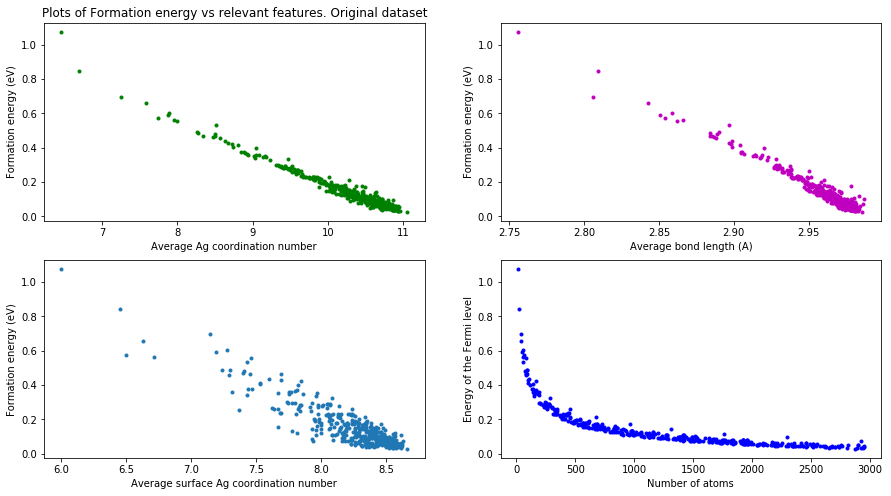

In [384]:
plt.figure(figsize=(15, 8))

plt.subplot(221)
plt.plot(df['Avg_total'], df['Formation_E'], '.', c='g')
plt.xlabel('Average Ag coordination number')
plt.ylabel('Formation energy (eV)')
plt.title('Plots of Formation energy vs relevant features. Original dataset')

plt.subplot(222)
plt.plot(df['Avg'], df['Formation_E'], '.', c='m')
plt.xlabel('Average bond length (A)')
plt.ylabel('Formation energy (eV)')

plt.subplot(223)
plt.plot(df['Avg_surf'], df['Formation_E'], '.')
plt.xlabel('Average surface Ag coordination number')
plt.ylabel('Formation energy (eV)')

plt.subplot(224)
plt.plot(df['N_Atoms'], df['Formation_E'], '.', c='b')
plt.xlabel('Number of atoms')
plt.ylabel('Energy of the Fermi level')


plt.show()

Features and targets from the original dataset:

In [363]:
X=df[feat_cols]
y=df['Formation_E']

Random split of the dataset:

In [364]:
from sklearn.model_selection import train_test_split
X_1, X_val, y_1, y_val = train_test_split(X,y, test_size=0.65, random_state=0)

In [365]:
X_1.shape, y_1.shape, X_val.shape, y_val.shape

((148, 4), (148,), (277, 4), (277,))

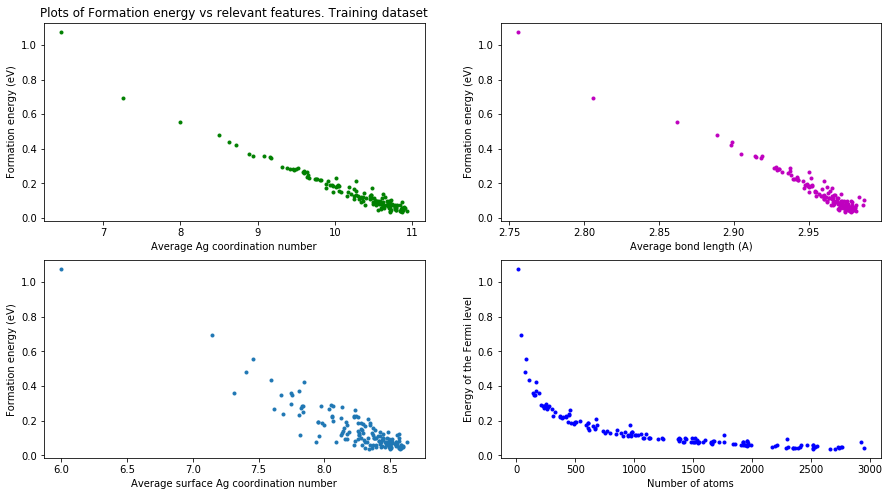

In [385]:
fig=plt.figure(figsize=(15, 8))

plt.subplot(221)
plt.plot(X_1['Avg_total'], y_1, '.', c='g')
plt.xlabel('Average Ag coordination number')
plt.ylabel('Formation energy (eV)')
plt.title('Plots of Formation energy vs relevant features. Training dataset')

plt.subplot(222)
plt.plot(X_1['Avg'], y_1, '.', c='m')
plt.xlabel('Average bond length (A)')
plt.ylabel('Formation energy (eV)')

plt.subplot(223)
plt.plot(X_1['Avg_surf'], y_1, '.')
plt.xlabel('Average surface Ag coordination number')
plt.ylabel('Formation energy (eV)')

plt.subplot(224)
plt.plot(X_1['N_Atoms'], y_1, '.', c='b')
plt.xlabel('Number of atoms')
plt.ylabel('Energy of the Fermi level')
plt.show()

The distribution of points is uniform, which is good for training the model with this dataset.

**Cross-Validation and model selection**

In [367]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

def cv_scores(model, x,y):
    scores=cross_val_score(model, x, y, cv=5)
    return "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)


Given the number of samples, n_estimators was chosen to be 10 in order to avoid overfitting. Other numbers were considered but showed detrimental effects to the fit.

In [368]:
print(cv_scores(RandomForestRegressor(n_estimators=10), X_1, y_1))
print(cv_scores(KNeighborsRegressor(n_neighbors=5), X_1, y_1))

Accuracy: 0.93 (+/- 0.15)
Accuracy: 0.88 (+/- 0.21)


The model of choice is Random Forest Regressor. It will be trained with the whole training dataset X_1 and y_1, and then tested agains the unseen dataset X_val and y_val.

In [369]:
# Training the model

model_RF=RandomForestRegressor(n_estimators=10)
model_RF.fit(X_1, y_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [370]:
model_RF.score(X_1, y_1)

0.9726565086607042

In [371]:
from sklearn.metrics import mean_absolute_error
y_predict=model_RF.predict(X_val)
mae = mean_absolute_error(y_predict, y_val)
print(mae)

0.010798268436070138


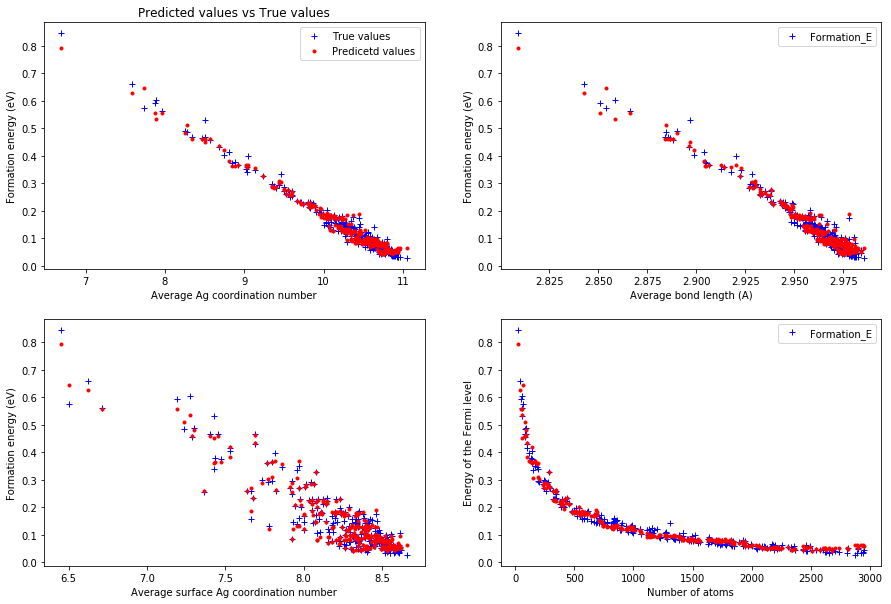

In [394]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(X_val['Avg_total'], y_val, '+', c='b', label='True values')
plt.plot(X_val['Avg_total'], y_predict,'.', c='r', label='Predicetd values')
plt.xlabel('Average Ag coordination number')
plt.ylabel('Formation energy (eV)')
plt.title('Predicted values vs True values')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(X_val['Avg'], y_val, '+', c='b', label='True values')
plt.plot(X_val['Avg'], y_predict, '.', c='r', label='Predicetd values')
plt.xlabel('Average bond length (A)')
plt.ylabel('Formation energy (eV)')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(X_val['Avg_surf'], y_val, '+', c='b', label='True values')
plt.plot(X_val['Avg_surf'], y_predict, '.', c='r', label='Predicetd values')
plt.xlabel('Average surface Ag coordination number')
plt.ylabel('Formation energy (eV)')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(X_val['N_Atoms'], y_val, '+', c='b', label='True values')
plt.plot(X_val['N_Atoms'], y_predict,'.', c='r', label='Predicetd values')
plt.xlabel('Number of atoms')
plt.ylabel('Energy of the Fermi level')
plt.legend(loc='best')

plt.show()